# App

## Package

In [1]:
from typing import Tuple, Union

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import pickle

from utils import get_data, get_metrics
from classic_CV import create_result_classic
from classic_model import create_data
from NN_model import get_NN_model

## Import data

In [2]:
data = get_data(path='../data/HRF/')

In [4]:
create = False
MLdata = create_data(path='./data/HRF/') if create else pd.read_csv('../data/for_CML/test_data.csv')

In [5]:
features_classic_ml = ['ch_avg_B', 'ch_avg_G', 'ch_avg_R', 'ch_std_B',
       'ch_std_G', 'ch_std_R', 'hu_mom1', 'hu_mom2', 'hu_mom3', 'hu_mom4',
       'hu_mom5', 'hu_mom6', 'hu_mom7', 'sp_mom_00', 'sp_mom_10', 'sp_mom_01',
       'sp_mom_20', 'sp_mom_11', 'sp_mom_02', 'sp_mom_30', 'sp_mom_21',
       'sp_mom_12', 'sp_mom_03', 'nu_mom_20', 'nu_mom_11', 'nu_mom_02',
       'nu_mom_30', 'nu_mom_21', 'nu_mom_12', 'nu_mom_03']

## Import models

In [6]:
classic_model = pickle.load(open('../trained/RFC_model','rb'))
NN_model = get_NN_model()
NN_model.load_weights('../trained/NN_model.h5')

## Results

In [7]:
def final_function(model: str='classic_CV', index: int=0) -> Union[Tuple[None, None], Tuple[np.ndarray, Tuple[float, float, float]]]:
    models = ['classic_CV', 'classic_ML', 'NN']
    dim = (876, 584)
    if model in models:
        if model == 'classic_CV':
            result = create_result_classic(data['original'][index][:, :, 1], data['mask'][index])
            metrics = get_metrics(result, data['labeled'][index])
        else:
            if index not in [0, 1, 2, 3, 4]:
                print('Wrong index. Choose between 0 and 4!')
                return None, None
            image = MLdata.loc[MLdata.id == index]
            if model == 'classic_ML':
                result = classic_model.predict_proba(image.drop(['Unnamed: 0', 'id', 'label'], axis=1))[:,1]
            else:
                result = NN_model.predict(image.drop(['Unnamed: 0', 'id', 'label'], axis=1))
            result = np.where(result > 0.3, 255, 0)
            result = np.pad(result.reshape(dim[1]-4, dim[0]-4), 2)
            label = cv2.resize(data['labeled'][index], dim, interpolation=cv2.INTER_AREA)
            label = np.where(label > 190, 255, 0)
            metrics = get_metrics(result, label)
    else:
        print('Wrong model')
        return None, None
    return result, metrics

In [8]:
def show_results(model, start=0, stop=5):
    metrics_summary = np.array([0.0, 0.0, 0.0])
    plt.figure(figsize=(5*2, 5*(stop-start)))
    num = stop-start

    for index in range(start, stop):
        new_plot, metric = final_function(model=model, index=index)
        print(f'{metric = }')
        metrics_summary += metric
        plt.subplot(num, 2, index*2+1)
        plt.imshow(new_plot, cmap='gray')
        plt.subplot(num, 2, index*2+2)
        plt.imshow(data['labeled'][index], cmap='gray')
    metrics_summary = metrics_summary/5
    print(f'accuracy:{metrics_summary[0]}, sensitivity:{metrics_summary[1]}, specificity:{metrics_summary[2]}')

### Classic test

metric = (0.9503734968255457, 0.558462287501439, 0.9948286434687224)
metric = (0.9519360456933759, 0.5433428413805388, 0.9967139339988879)
metric = (0.9413011841652593, 0.4980021315225806, 0.993626977534884)
metric = (0.9583181843059986, 0.6871116030176218, 0.9865445834850224)
metric = (0.9631325207590542, 0.6739394087056333, 0.991823873526534)
accuracy:0.9530122863498468, sensitivity:0.5921716544255626, specificity:0.9927076024028102


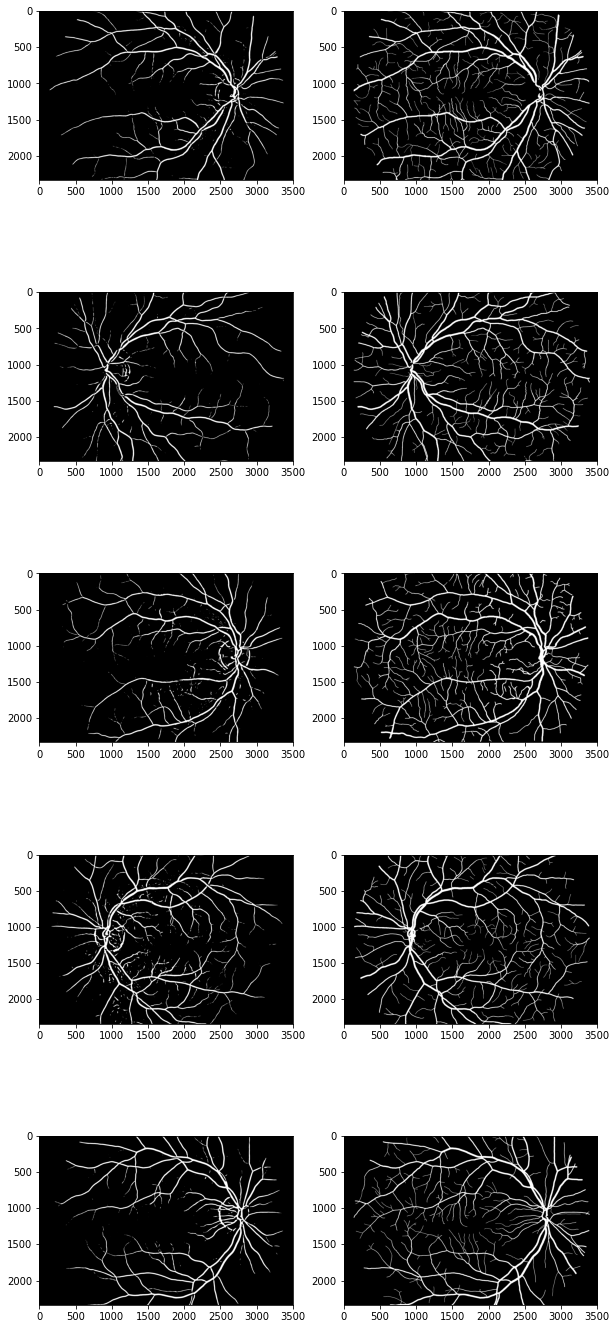

In [9]:
show_results('classic_CV')

### ML test

metric = (0.9130269906799274, 0.07608865129747187, 0.9935395948908159)
metric = (0.9120379057984612, 0.08971598250107668, 0.9896441887876577)
metric = (0.907033839994996, 0.004731065225619244, 0.9995108032739545)
metric = (0.9178746794270345, 0.025710612769604343, 0.9976830260361431)
metric = (0.9214733064364796, 0.016883731354433846, 0.9985278738807917)
accuracy:0.9142893444673797, sensitivity:0.0426260086296412, specificity:0.9957810973738725


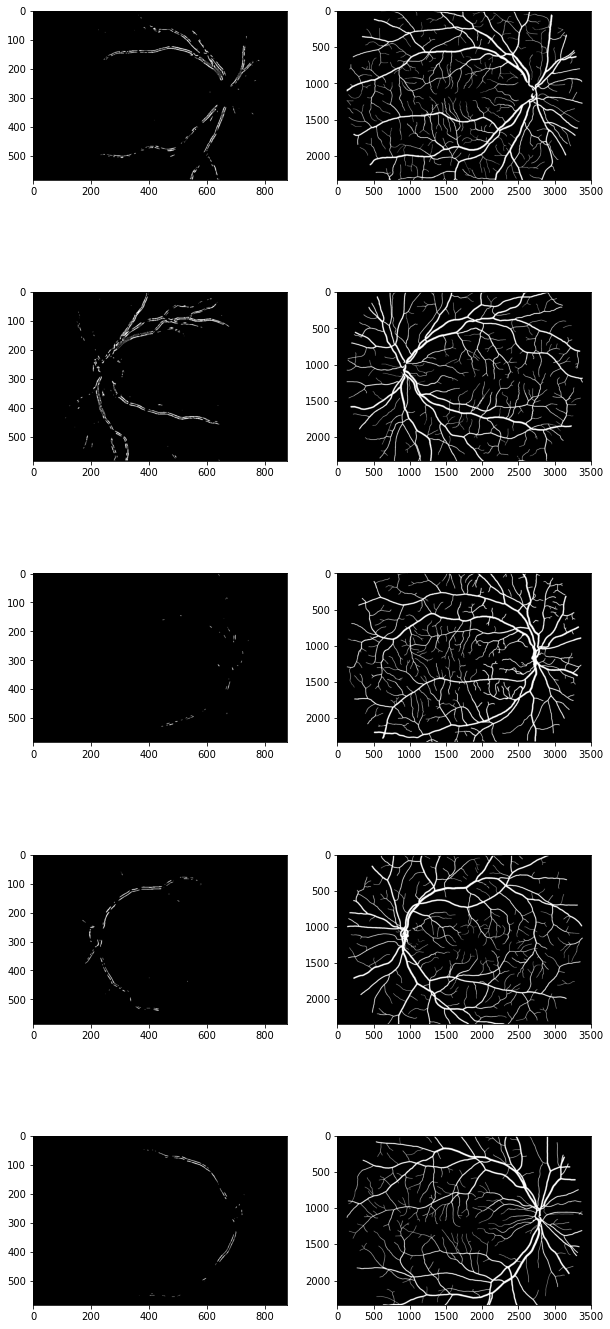

In [10]:
show_results('classic_ML')

### Neural Network

metric = (0.9102122036654782, 0.02597171177191224, 0.9952752261141788)
metric = (0.910966722962407, 0.038329895505134076, 0.9933214537068927)
metric = (0.9069263307687496, 0.01055553219227049, 0.9987953261239672)
metric = (0.9178746794270345, 0.006451459315335905, 0.99940584950743)
metric = (0.9216355476324514, 0.01494135518091491, 0.9988693901706945)
accuracy:0.9135230968912241, sensitivity:0.01924999079311352, specificity:0.9971334491246328


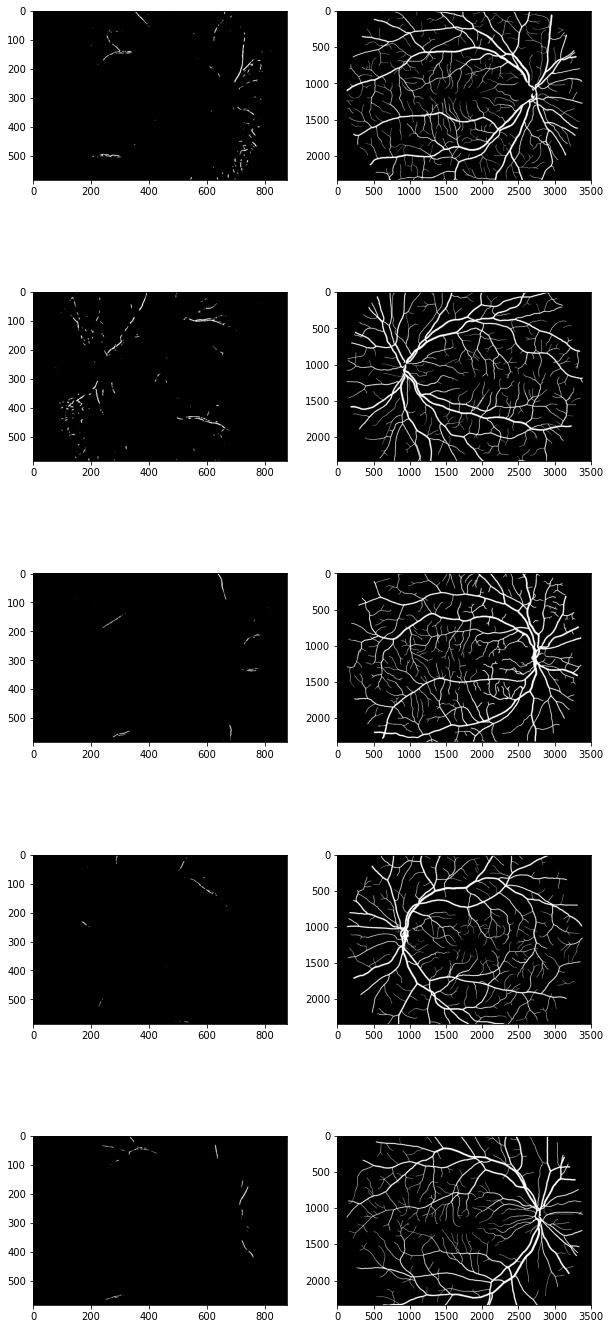

In [11]:
show_results('NN')

# Type here to test

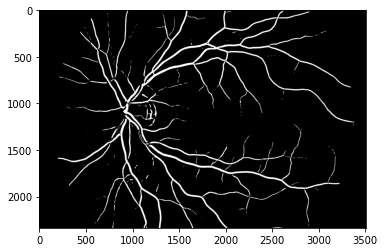

In [12]:
new_plot, metric = final_function(model='classic_CV', index=1)
plt.imshow(new_plot, cmap='gray')